<a href="https://colab.research.google.com/github/priyankabutun/Data/blob/main/MyPlaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
import missingno as msno
#Interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

In [3]:
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
 $('div.cell.code_cell.rendered.selected div.input').hide();
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" class="btn btn-primary" value="Click here to toggle on/off the raw code."></form>''')

<h3>We are going to use a simple csv file "Playstore.csv", available on Kaggle.
Before getting into actual <i>movie</i>, let's have a look at our main characters :- </h3>

    1) App :- Name of the App
    2) Category :- Category under which the App falls.
    3) Rating :- Application's rating on playstore
    4) Reviews :- Number of reviews of the App.
    5) Size :- Size of the App.
    6) Install :- Number of Installs of the App
    7) Type :- If the App is free/paid
    8) Price :- Price of the app (0 if it is Free)
    9) Content Rating :- Appropiate Target Audience of the App.
    10) Genres:- Genre under which the App falls.
    11) Last Updated :- Date when the App was last updated
    12) Current Ver :- Current Version of the Application
    13) Android Ver :- Minimum Android Version required to run the App

<i>So now we know our characters and a basic plot, lets start our movie with no more delay. </i>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/Colab Notebooks/googleplaystore.csv'
listdata= pd.read_csv(file_path)

In [6]:
display(listdata.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Get  basic information about the dataset
print(listdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [8]:
#Handle missing value (e.g.,filling or dropping)
listdata['Rating'].fillna(listdata['Rating'].mean(), inplace=True)
listdata.dropna(subset=['App', 'Category'], inplace=True)

In [9]:
listdata.duplicated().sum()

np.int64(483)

In [86]:
# Display all duplicated rows
duplicated_rows = listdata[listdata.duplicated()]

In [11]:
# Delete duplicated rows
listdata.drop_duplicates(inplace=True)

In [12]:
# Display the shape of the Data Frame to confirm removal
print("Shape of the Data Frame after removing duplicates:")
print(listdata.shape)

Shape of the Data Frame after removing duplicates:
(10358, 13)


In [87]:
# Convert scientific notation to simple numbers for better reading
pd.options.display.float_format = '{:.2f}'.format
print(listdata.describe())
# Reset the float format to default
pd.options.display.float_format = None

        Rating     Reviews    Size      Installs    Price  \
count 10357.00    10357.00 8831.00      10357.00 10357.00   
mean      4.19   405904.61   21.29   14157759.44     1.03   
min       1.00        0.00    0.01          0.00     0.00   
25%       4.10       32.00    4.70       1000.00     0.00   
50%       4.20     1680.00   13.00     100000.00     0.00   
75%       4.50    46416.00   29.00    1000000.00     0.00   
max       5.00 78158306.00  100.00 1000000000.00   400.00   
std       0.48  2696777.84   22.54   80239553.87    16.28   

                        Last Updated     Year    Month  
count                          10357 10357.00 10357.00  
mean   2017-11-14 09:25:19.320266496  2017.38     6.40  
min              2010-05-21 00:00:00  2010.00     1.00  
25%              2017-09-03 00:00:00  2017.00     5.00  
50%              2018-05-20 00:00:00  2018.00     7.00  
75%              2018-07-19 00:00:00  2018.00     8.00  
max              2018-08-08 00:00:00  2018.00    12

In [14]:
listdata['Reviews'] = pd.to_numeric(listdata['Reviews'], errors='coerce')

In [15]:
listdata['Installs'] = listdata['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
listdata['Installs'] = pd.to_numeric(listdata['Installs'], errors='coerce')

In [16]:
 def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convert kilobytes to megabytes
    else:
        return np.nan # Handle 'Varies with device' and other non-numeric values

listdata['Size'] = listdata['Size'].apply(convert_size)

In [17]:
listdata['Price'] = listdata['Price'].str.replace('$', '', regex=False)
listdata['Price'] = pd.to_numeric(listdata['Price'], errors='coerce')

In [18]:
listdata['Last Updated'] = pd.to_datetime(listdata['Last Updated'], errors='coerce')

In [19]:
# Calculate the number of apps per category
category_counts = listdata['Category'].value_counts()

# Display the counts
display(category_counts)

,count
Category,
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366


In [84]:
# Remove rows where 'Category' is '1.9'
listdata = listdata[listdata['Category'] != '1.9']

<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='count', ylabel='Category'>

Text(0.5, 1.0, 'Distribution of Apps by Category')

Text(0.5, 0, 'Number of Apps')

Text(0, 0.5, 'Category')

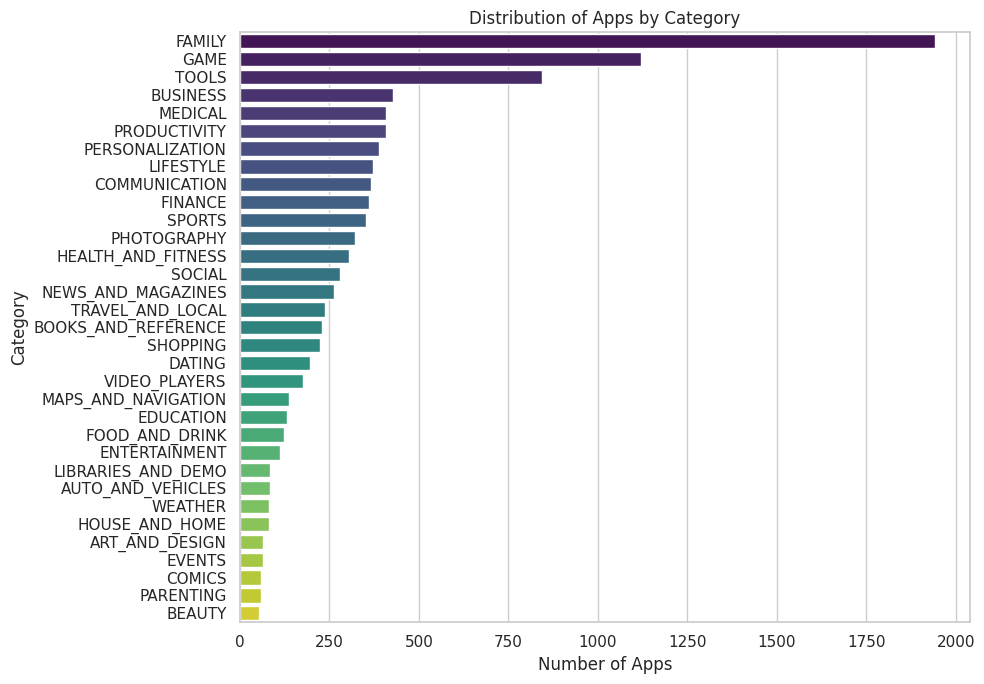

In [88]:
plt.figure(figsize=(10,7))
sns.countplot(data=listdata, y='Category', order=listdata['Category'].value_counts().index, palette='viridis')
plt.title('Distribution of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Content Rating', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Apps by Content Rating')

Text(0.5, 0, 'Content Rating')

Text(0, 0.5, 'Number of Apps')

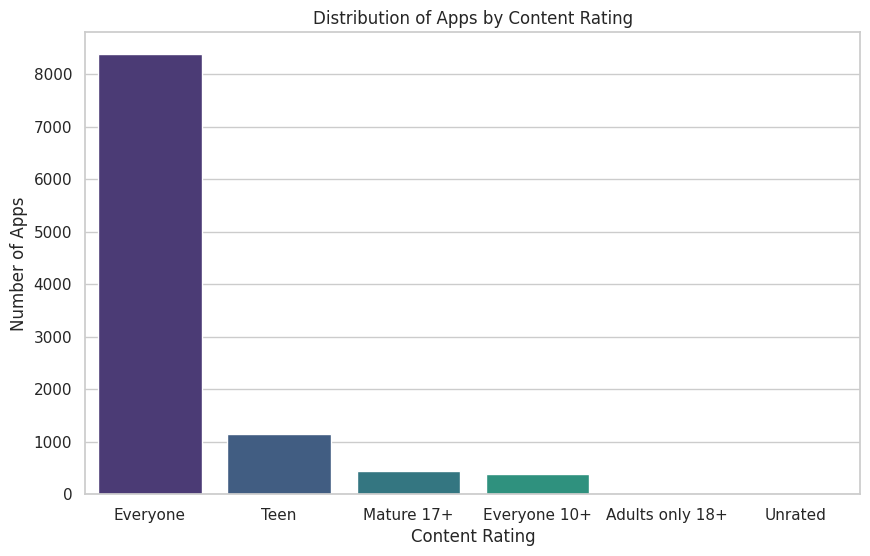

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=listdata, x='Content Rating', order=listdata['Content Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()



<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Type', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Apps by Type')

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Number of Apps')

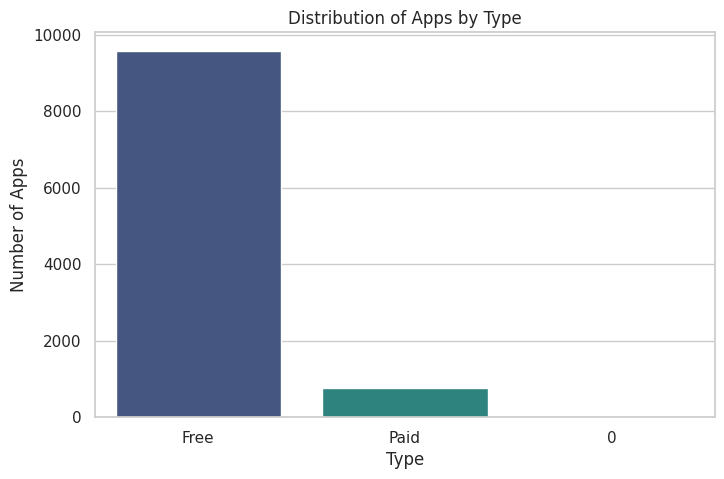

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=listdata, x='Type', order=listdata['Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Apps by Type')
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Installs_category', ylabel='Rating'>

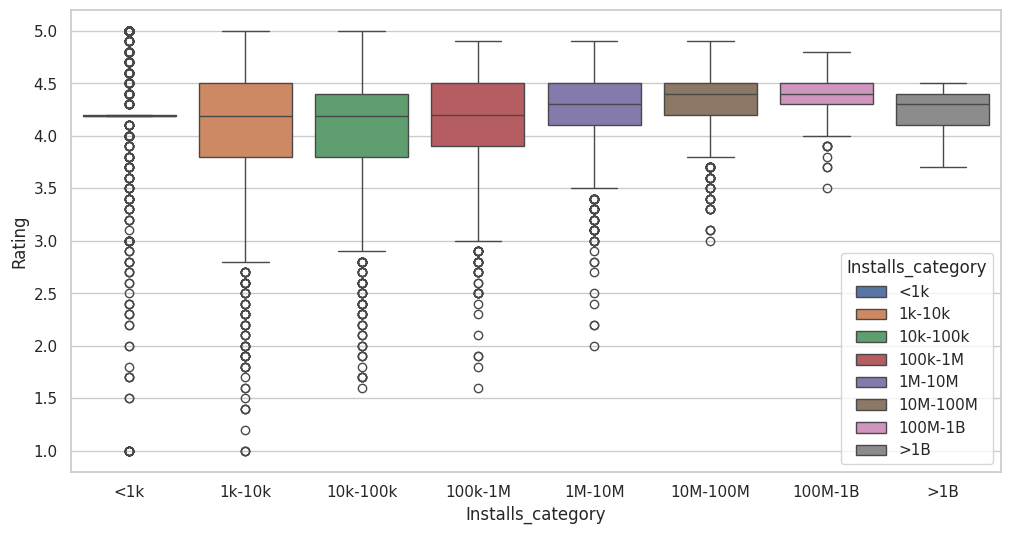

In [69]:
plt.figure(figsize=(12, 6)) #figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=listdata)


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Installs_category', ylabel='Reviews'>

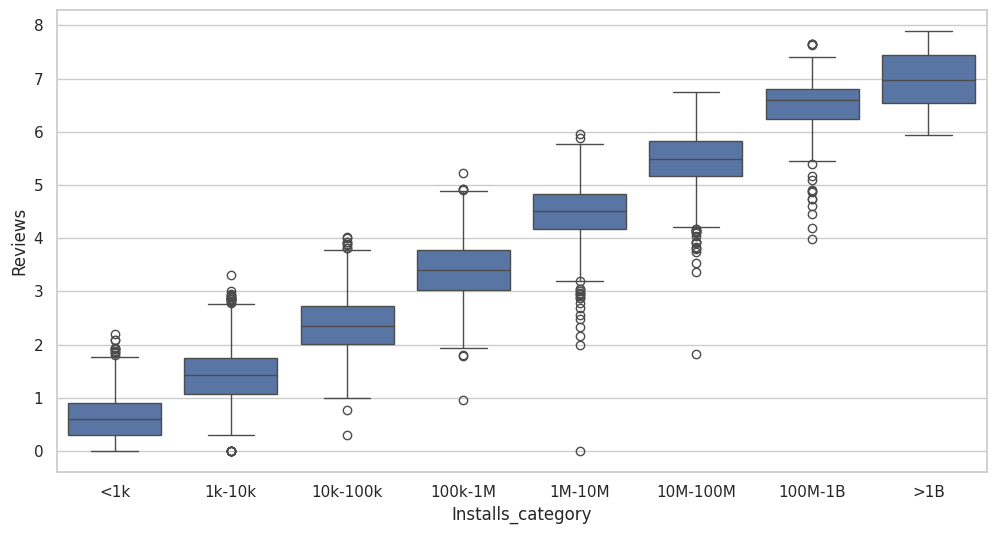

In [70]:
plt.figure(figsize=(12, 6)) #figure size
sns.boxplot(x='Installs_category', y= np.log10(listdata['Reviews']), data=listdata) # boxplot

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Content Rating'>

Text(0.5, 1.0, 'Average Installs by Content Rating')

Text(0.5, 0, 'Content Rating')

Text(0, 0.5, 'Average Installs')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone 10+'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

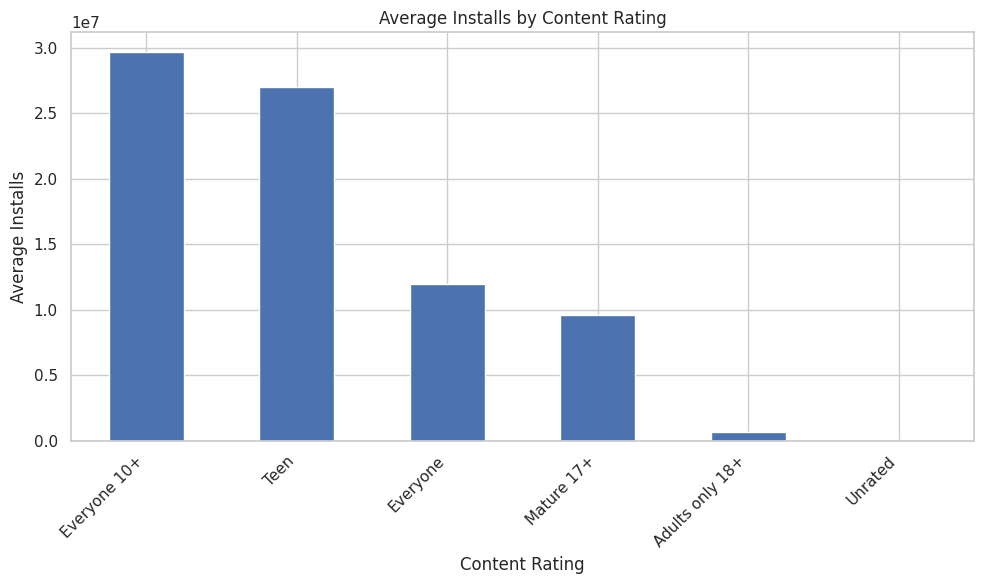

In [29]:

plt.figure(figsize=(10, 6))
average_installs_by_content_rating.plot(kind='bar')
plt.title('Average Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Installs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Top 10 Categories by Total Installs')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Total Installs')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'GAME'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'SOCIAL'),
  Text(3, 0, 'PRODUCTIVITY'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'FAMILY'),
  Text(6, 0, 'PHOTOGRAPHY'),
  Text(7, 0, 'TRAVEL_AND_LOCAL'),
  Text(8, 0, 'VIDEO_PLAYERS'),
  Text(9, 0, 'NEWS_AND_MAGAZINES')])

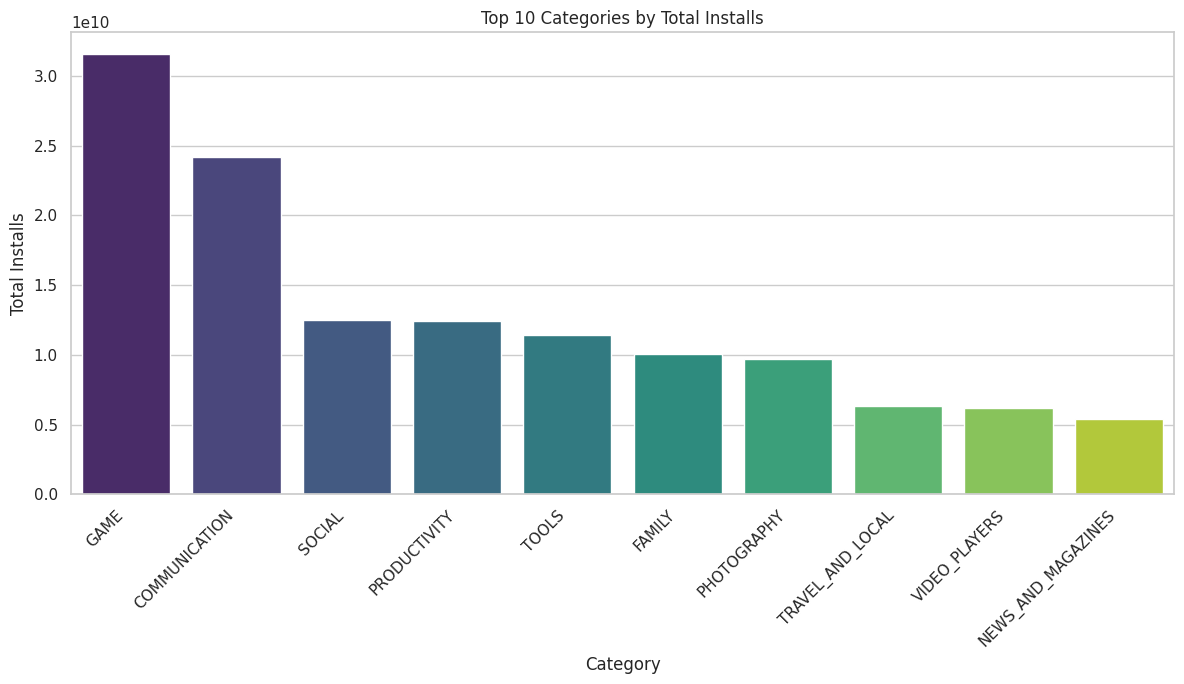

In [31]:
# Plot the top 10 categories by total installs
plt.figure(figsize=(12, 7))
sns.barplot(x=category_installs.index, y=category_installs.values, palette='viridis')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='App'>

Text(0.5, 1.0, 'Top 10 Apps by Average Rating')

Text(0.5, 0, 'App')

Text(0, 0.5, 'Average Rating')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Life Made WI-Fi Touchscreen Photo Frame'),
  Text(1, 0, 'AJ Cam'),
  Text(2, 0, 'AJ Blue Icon Pack'),
  Text(3, 0, 'AI Today : Artificial Intelligence News & AI 101'),
  Text(4, 0, 'Tozer Devotional -Series 1'),
  Text(5, 0, 'Barbers.BH'),
  Text(6, 0, 'Bar-B-Q Rib House'),
  Text(7, 0, 'Exam Result BD'),
  Text(8, 0, 'AJ Gray Dark Icon Pack'),
  Text(9, 0, "CJ'S TIRE AND AUTO INC.")])

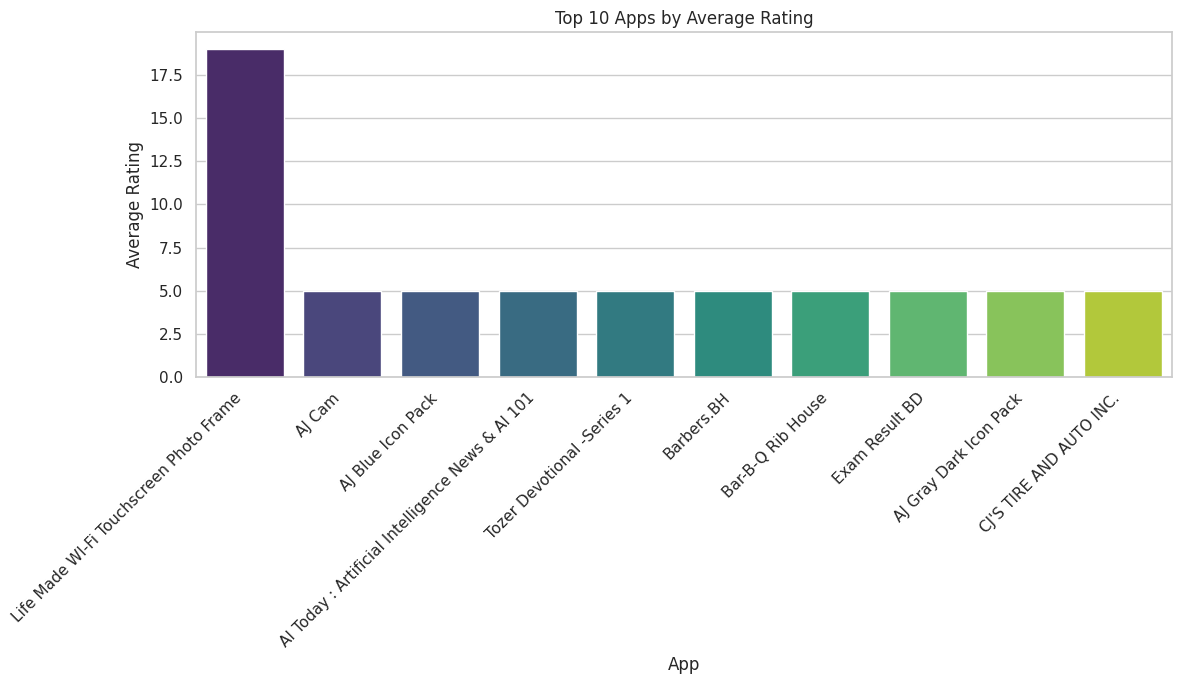

In [32]:

# Plot the top 10 apps by average rating
plt.figure(figsize=(12, 7))
sns.barplot(x=app_ratings.index, y=app_ratings.values, palette='viridis')
plt.title('Top 10 Apps by Average Rating')
plt.xlabel('App')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1200x300 with 0 Axes>

<Axes: xlabel='Year'>

Text(0.5, 1.0, 'Number of Apps Updated Over the Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Apps Updated')

([<matplotlib.axis.XTick at 0x7eaba854ea20>,
 [Text(2010.0, 0, '2010'),
  Text(2011.0, 0, '2011'),
  Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018')])

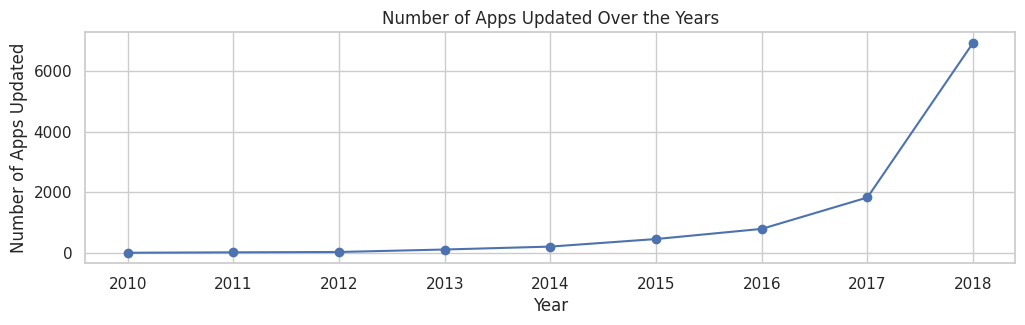

In [44]:
plt.figure(figsize=(12, 3))
updates_by_year.plot(kind='line', marker='o')
plt.title('Number of Apps Updated Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Apps Updated')
plt.xticks(updates_by_year.index)
plt.grid(True)
plt.show()


<Figure size 1200x700 with 0 Axes>

<Axes: ylabel='App'>

Text(0.5, 1.0, 'Top 10 Apps by Total Reviews (Horizontal)')

Text(0.5, 0, 'Total Reviews')

Text(0, 0.5, 'App')

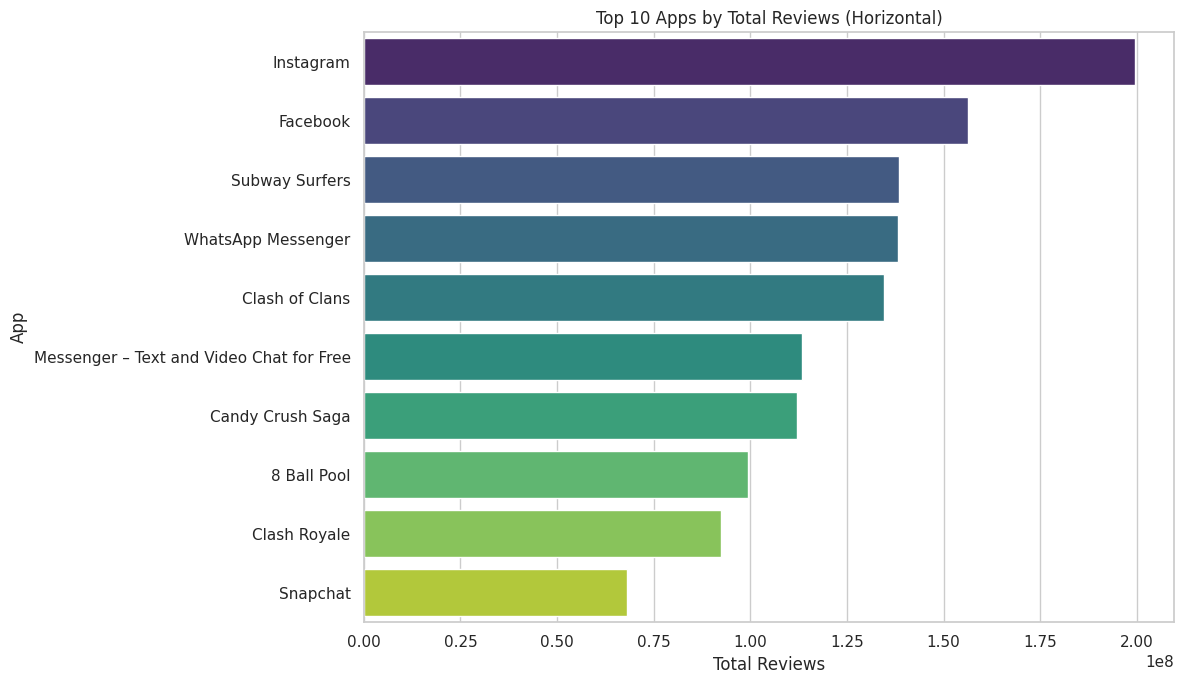

In [38]:
# Calculate the sum of reviews for each app and get the top 10
top_10_apps_by_reviews = listdata.groupby('App')['Reviews'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 apps by sum of reviews as a horizontal bar chart
plt.figure(figsize=(12, 7))
sns.barplot(y=top_10_apps_by_reviews.index, x=top_10_apps_by_reviews.values, palette='viridis')
plt.title('Top 10 Apps by Total Reviews (Horizontal)')
plt.xlabel('Total Reviews')
plt.ylabel('App')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Top 10 Categories by Total Installs (Vertical)')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Total Installs')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'GAME'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'SOCIAL'),
  Text(3, 0, 'PRODUCTIVITY'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'FAMILY'),
  Text(6, 0, 'PHOTOGRAPHY'),
  Text(7, 0, 'TRAVEL_AND_LOCAL'),
  Text(8, 0, 'VIDEO_PLAYERS'),
  Text(9, 0, 'NEWS_AND_MAGAZINES')])

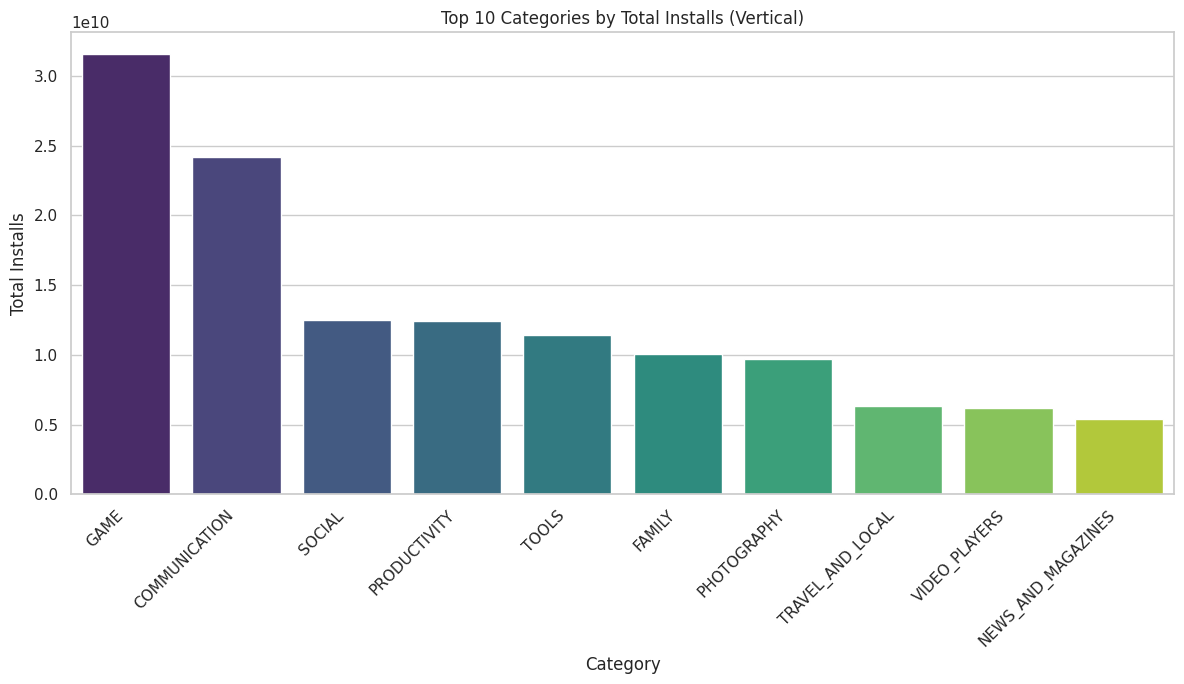

In [ ]:
# Calculate total installs per category and get the top 10
category_installs = listdata.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 categories by total installs as a vertical bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=category_installs.index, y=category_installs.values, palette='viridis')
plt.title('Top 10 Categories by Total Installs (Vertical)')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='App'>

Text(0.5, 1.0, 'Top 10 Paid Apps by Total Installs')

Text(0.5, 0, 'App')

Text(0, 0.5, 'Total Installs')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Minecraft'),
  Text(1, 0, 'Hitman Sniper'),
  Text(2, 0, 'HD Widgets'),
  Text(3, 0, 'True Skate'),
  Text(4, 0, 'Stickman Legends: Shadow Wars'),
  Text(5, 0, 'Fruit Ninja Classic'),
  Text(6, 0, 'Tasker'),
  Text(7, 0, 'Threema'),
  Text(8, 0, "Five Nights at Freddy's"),
  Text(9, 0, 'DraStic DS Emulator')])

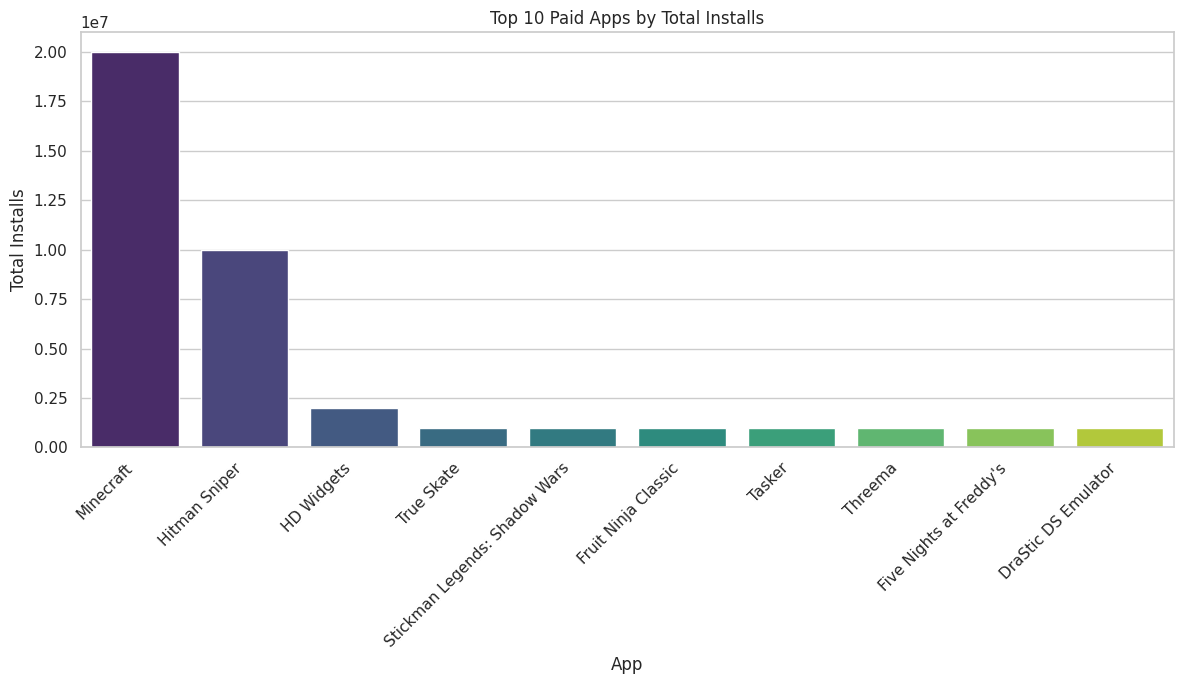

In [39]:
# Filter for paid apps
paid_apps = listdata[listdata['Type'] == 'Paid']

# Calculate total installs for each paid app and get the top 10
top_10_paid_apps_by_installs = paid_apps.groupby('App')['Installs'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 paid apps by total installs
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_paid_apps_by_installs.index, y=top_10_paid_apps_by_installs.values, palette='viridis')
plt.title('Top 10 Paid Apps by Total Installs')
plt.xlabel('App')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Rating', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Rating (Filtered)')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Density')

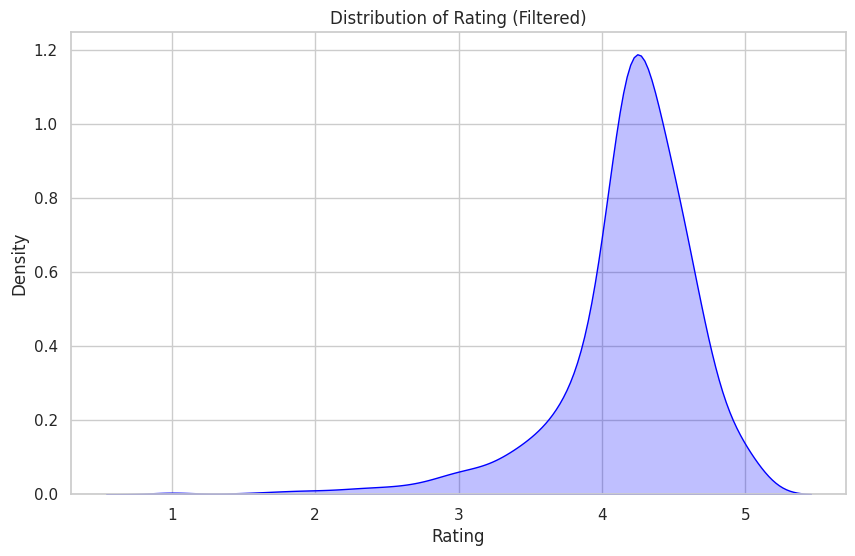

In [51]:
# Filter the data to include only ratings up to 7.5
filtered_listdata = listdata[listdata['Rating'] <= 7.5].copy()

# Plot the rating distribution with the filtered data
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_listdata['Rating'], color="blue", shade=True, bw_adjust=2)
plt.title('Distribution of Rating (Filtered)')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

<Figure size 1600x600 with 0 Axes>

<Axes: xlabel='Rating', ylabel='Reviews'>

Text(0.5, 1.0, 'Rating vs Reviews colored by Install Category')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Reviews')

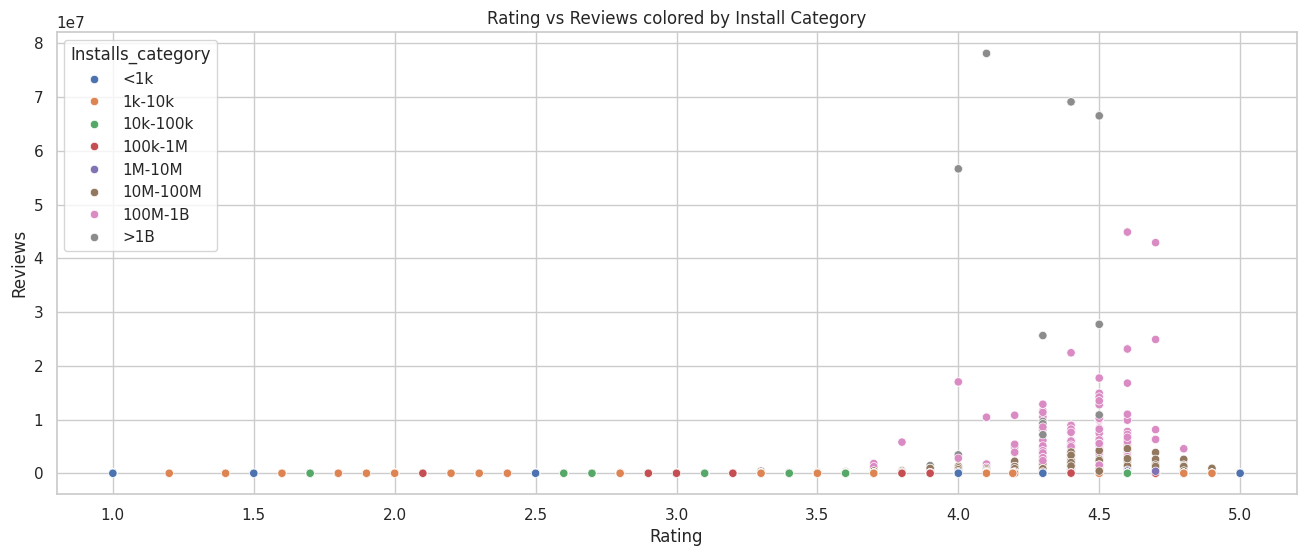

In [57]:
# Create a new column to categorize 'Installs'
listdata['Installs_category'] = pd.cut(listdata['Installs'], bins=[0, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, np.inf],
                                      labels=['<1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M-100M', '100M-1B', '>1B'],
                                      right=False)

# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=listdata) # plot the scatter plot
plt.title('Rating vs Reviews colored by Install Category')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

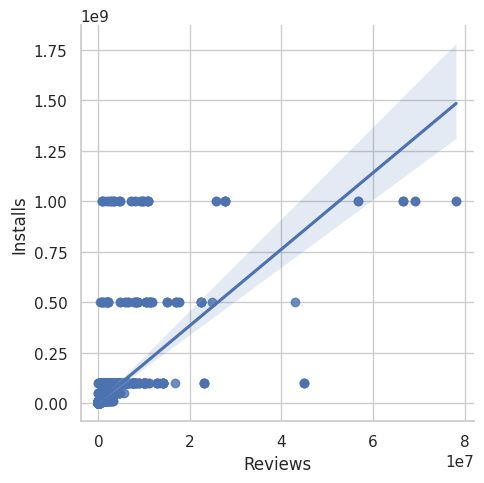

In [53]:
plt.figure(figsize=(16, 6)) # figure size
sns.lmplot(x='Reviews', y='Installs', data=listdata) #scatter plot with trendline

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Numeric Columns')

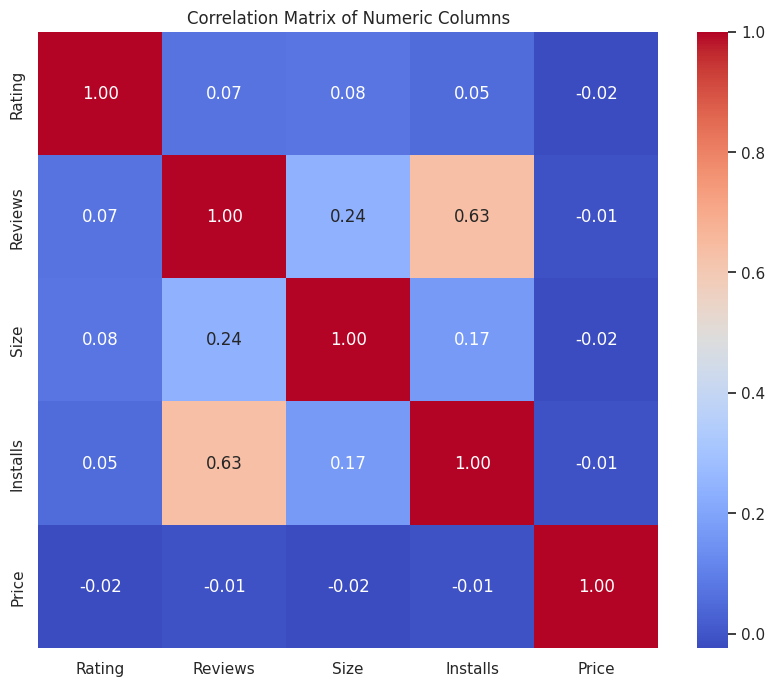

In [ ]:
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
correlation_matrix = listdata[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()